In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.6 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

# 1. Tentukan ID Aplikasi Netflix
APP_ID = 'com.netflix.mediaclient'

# 2. Ambil Semua Ulasan (atau sejumlah besar ulasan)
# Gunakan reviews_all untuk mencoba mengambil sebanyak mungkin ulasan
result = reviews_all(
    APP_ID,
    lang='id',  # Bahasa ulasan: Indonesia
    country='id', # Negara ulasan: Indonesia
    sort=Sort.NEWEST,  # Urutan ulasan: Terbaru
    filter_score_with=None # Mengambil semua skor (1-5 bintang). Bisa diisi (1, 2, 3, 4, 5)
)

# 3. Ubah Hasil Scraping ke dalam DataFrame (Tabel Data)
df_ulasan_netflix = pd.DataFrame(result)

# 4. Tampilkan kolom-kolom penting
print("Contoh 5 Baris Pertama Data:")
print(df_ulasan_netflix[['userName', 'score', 'content', 'at', 'thumbsUpCount']].head())

# 5. Simpan Data ke File CSV
df_ulasan_netflix.to_csv('ulasan_netflix_playstore.csv', index=False, encoding='utf-8')
print(f"\nData berhasil disimpan ke 'ulasan_netflix_playstore.csv' dengan total {len(df_ulasan_netflix)} ulasan.")

Contoh 5 Baris Pertama Data:
          userName  score                                            content  \
0  Pengguna Google      1  Halo selamat malam admin, untuk anime ONE PIEC...   
1  Pengguna Google      1  rating ga seberapa loginnya susah minta ampun ...   
2  Pengguna Google      1           Payah gak bisa dibuka percuma di donload   
3  Pengguna Google      5                                               good   
4  Pengguna Google      5                      kualitas flimnya bagus sekali   

                   at  thumbsUpCount  
0 2025-10-06 13:15:59              0  
1 2025-10-06 11:18:34              0  
2 2025-10-06 11:05:04              0  
3 2025-10-06 10:45:08              0  
4 2025-10-06 10:12:45              0  

Data berhasil disimpan ke 'ulasan_netflix_playstore.csv' dengan total 18000 ulasan.


In [ ]:
from google_play_scraper import Sort, reviews
import pandas as pd
import time
import json
import os

# --- KONFIGURASI ---
APP_ID = 'com.netflix.mediaclient'
NAMA_FILE = 'ulasan_netflix_1000_data.csv'
TARGET_JUMLAH = 1000
# --------------------

print(f"Memulai scraping ulasan Netflix (ID: {APP_ID})...")
print(f"Target jumlah ulasan: {TARGET_JUMLAH}")

# Fungsi untuk mengambil ulasan secara iteratif
def fetch_reviews(app_id, count, lang='id', country='id'):
    all_reviews = []
    continuation_token = None

    # Loop untuk mengambil data hingga mencapai target
    while len(all_reviews) < count:
        try:
            # Ambil ulasan, dibatasi 200 per permintaan untuk mencegah timeout
            result, continuation_token = reviews(
                app_id,
                lang=lang,
                country=country,
                sort=Sort.NEWEST,  # Mengambil ulasan terbaru
                count=min(200, count - len(all_reviews)), # Batasan per panggilan
                filter_score_with=None, # Ambil semua skor
                continuation_token=continuation_token # Token untuk melanjutkan halaman berikutnya
            )

            all_reviews.extend(result)

            print(f"-> Berhasil mengambil {len(result)} ulasan baru. Total saat ini: {len(all_reviews)}")

            if continuation_token is None:
                print("Tidak ada lagi ulasan untuk diambil. Mengakhiri proses.")
                break

            # Jeda sebentar agar tidak terdeteksi sebagai bot
            time.sleep(1)

        except Exception as e:
            print(f"Terjadi error: {e}. Menunggu 5 detik dan mencoba lagi.")
            time.sleep(5)

    # Batasi hasilnya sesuai target jika lebih
    return all_reviews[:count]

# 1. Proses Pengambilan Data
data_ulasan = fetch_reviews(APP_ID, TARGET_JUMLAH)

if not data_ulasan:
    print("Gagal mengambil data ulasan.")
else:
    # 2. Pembersihan dan Pemilihan Kolom (CSV yang Rapi)

    # Konversi ke DataFrame
    df = pd.DataFrame(data_ulasan)

    # Pilih dan Atur Ulang Kolom agar lebih rapi untuk Analisis Sentimen/Topik
    df_rapi = df[[
        'userName',
        'score',
        'content',
        'at',
        'replyContent',
        'thumbsUpCount',
        'reviewId'
    ]].copy()

    # Ubah format tanggal (kolom 'at') agar lebih mudah dibaca
    df_rapi['at'] = pd.to_datetime(df_rapi['at']).dt.strftime('%Y-%m-%d %H:%M:%S')

    # Ganti nama kolom untuk kejelasan
    df_rapi.rename(columns={
        'userName': 'Nama Pengguna',
        'score': 'Skor (Bintang)',
        'content': 'Ulasan Teks',
        'at': 'Tanggal Ulasan',
        'replyContent': 'Balasan Pengembang',
        'thumbsUpCount': 'Jumlah Like',
        'reviewId': 'ID Ulasan'
    }, inplace=True)

    # 3. Simpan ke File CSV
    df_rapi.to_csv(NAMA_FILE, index=False, encoding='utf-8')

    print("\n" + "="*50)
    print("✅ PROSES SELESAI!")
    print(f"Total ulasan yang berhasil diambil: {len(df_rapi)}")
    print(f"Data disimpan ke file: {os.path.abspath(NAMA_FILE)}")
    print("="*50)

Memulai scraping ulasan Netflix (ID: com.netflix.mediaclient)...
Target jumlah ulasan: 1000
-> Berhasil mengambil 200 ulasan baru. Total saat ini: 200
-> Berhasil mengambil 200 ulasan baru. Total saat ini: 400
-> Berhasil mengambil 200 ulasan baru. Total saat ini: 600
-> Berhasil mengambil 200 ulasan baru. Total saat ini: 800
-> Berhasil mengambil 200 ulasan baru. Total saat ini: 1000

✅ PROSES SELESAI!
Total ulasan yang berhasil diambil: 1000
Data disimpan ke file: /content/ulasan_netflix_1000_data.csv


In [ ]:
from google_play_scraper import Sort, reviews
import pandas as pd
import time
import json
import os

# --- KONFIGURASI ---
APP_ID = 'com.netflix.mediaclient'
NAMA_FILE = 'ulasan_netflix_1000_data.csv'
TARGET_JUMLAH = 1000
# --------------------

print(f"Memulai scraping ulasan Netflix (ID: {APP_ID})...")
print(f"Target jumlah ulasan: {TARGET_JUMLAH}")

# Fungsi untuk mengambil ulasan secara iteratif (tidak diubah)
def fetch_reviews(app_id, count, lang='id', country='id'):
    all_reviews = []
    continuation_token = None

    # Loop untuk mengambil data hingga mencapai target
    while len(all_reviews) < count:
        try:
            # Ambil ulasan, dibatasi 200 per permintaan untuk mencegah timeout
            result, continuation_token = reviews(
                app_id,
                lang=lang,
                country=country,
                sort=Sort.NEWEST,  # Mengambil ulasan terbaru
                count=min(200, count - len(all_reviews)), # Batasan per panggilan
                filter_score_with=None, # Ambil semua skor
                continuation_token=continuation_token # Token untuk melanjutkan halaman berikutnya
            )

            all_reviews.extend(result)

            print(f"-> Berhasil mengambil {len(result)} ulasan baru. Total saat ini: {len(all_reviews)}")

            if continuation_token is None:
                print("Tidak ada lagi ulasan untuk diambil. Mengakhiri proses.")
                break

            # Jeda sebentar agar tidak terdeteksi sebagai bot
            time.sleep(1)

        except Exception as e:
            print(f"Terjadi error: {e}. Menunggu 5 detik dan mencoba lagi.")
            time.sleep(5)

    # Batasi hasilnya sesuai target jika lebih
    return all_reviews[:count]

# 1. Proses Pengambilan Data
data_ulasan = fetch_reviews(APP_ID, TARGET_JUMLAH)

if not data_ulasan:
    print("Gagal mengambil data ulasan.")
else:
    # 2. Pembersihan dan Pemilihan Kolom (CSV yang Rapi)

    # Konversi ke DataFrame
    df = pd.DataFrame(data_ulasan)

    # Pilih dan Atur Ulang Kolom agar lebih rapi untuk Analisis Sentimen/Topik
    df_rapi = df[[
        'userName',
        'score',
        'content',
        'at',
        'replyContent',
        'thumbsUpCount',
        'reviewId'
    ]].copy()

    # Ubah format tanggal (kolom 'at') agar lebih mudah dibaca
    df_rapi['at'] = pd.to_datetime(df_rapi['at']).dt.strftime('%Y-%m-%d %H:%M:%S')

    # Ganti nama kolom untuk kejelasan
    df_rapi.rename(columns={
        'userName': 'Nama Pengguna',
        'score': 'Skor (Bintang)',
        'content': 'Ulasan Teks',
        'at': 'Tanggal Ulasan',
        'replyContent': 'Balasan Pengembang',
        'thumbsUpCount': 'Jumlah Like',
        'reviewId': 'ID Ulasan'
    }, inplace=True)

    # 3. Simpan ke File CSV
    # *** PERUBAHAN UTAMA DI SINI: MENAMBAHKAN sep=';' ***
    df_rapi.to_csv(NAMA_FILE, index=False, encoding='utf-8', sep=';')

    print("\n" + "="*50)
    print("✅ PROSES SELESAI!")
    print(f"Total ulasan yang berhasil diambil: {len(df_rapi)}")
    print(f"Data disimpan ke file: {os.path.abspath(NAMA_FILE)}")
    print("="*50)

Memulai scraping ulasan Netflix (ID: com.netflix.mediaclient)...
Target jumlah ulasan: 1000
-> Berhasil mengambil 200 ulasan baru. Total saat ini: 200
-> Berhasil mengambil 200 ulasan baru. Total saat ini: 400
-> Berhasil mengambil 200 ulasan baru. Total saat ini: 600
-> Berhasil mengambil 200 ulasan baru. Total saat ini: 800
-> Berhasil mengambil 200 ulasan baru. Total saat ini: 1000

✅ PROSES SELESAI!
Total ulasan yang berhasil diambil: 1000
Data disimpan ke file: /content/ulasan_netflix_1000_data.csv


In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Misalnya, data hasil scraping ada di DataFrame
data = pd.read_csv('Data_Ulasan NETFLIX.csv')

# Hapus kolom yang berisi nama pengguna (jika ada kolom 'username')
data.drop(columns=['Nama Pengguna'], inplace=True)

# Menyimpan data setelah penghapusan nama pengguna
data.to_csv('data_nama pengguna dihps.csv', index=False)


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Memuat dataset
df = pd.read_csv('Data_Ulasan NETFLIX.csv')

# Pastikan resource nltk sudah terunduh
nltk.download('punkt')
nltk.download('stopwords')

# Case folding: Mengubah teks menjadi huruf kecil
df['Ulasan Teks'] = df['Ulasan Teks'].apply(lambda x: x.lower())

# Tokenizing: Memecah teks menjadi kata-words
df['Tokens'] = df['Ulasan Teks'].apply(word_tokenize)

# Stemming: Mengubah kata menjadi bentuk dasarnya
ps = PorterStemmer()
df['Stemmed'] = df['Tokens'].apply(lambda x: [ps.stem(word) for word in x])

# Filtering: Menghapus stopwords dan karakter non-alfanumeric
stop_words = set(stopwords.words('english'))

def filter_tokens(tokens):
    return [word for word in tokens if word.isalnum() and word not in stop_words]

df['Filtered'] = df['Stemmed'].apply(filter_tokens)

# Menyimpan dataframe yang sudah diproses
df.to_csv('/content/processed_reviews.csv', index=False)

# Menampilkan preview data yang sudah diproses
display(df[['Ulasan Teks', 'Tokens', 'Stemmed', 'Filtered']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Ulasan Teks,Tokens,Stemmed,Filtered
0,"halo selamat malam admin, untuk anime one piec...","[halo, selamat, malam, admin, ,, untuk, anime,...","[halo, selamat, malam, admin, ,, untuk, anim, ...","[halo, selamat, malam, admin, untuk, anim, one..."
1,rating ga seberapa loginnya susah minta ampun ...,"[rating, ga, seberapa, loginnya, susah, minta,...","[rate, ga, seberapa, loginnya, susah, minta, a...","[rate, ga, seberapa, loginnya, susah, minta, a..."
2,payah gak bisa dibuka percuma di donload,"[payah, gak, bisa, dibuka, percuma, di, donload]","[payah, gak, bisa, dibuka, percuma, di, donload]","[payah, gak, bisa, dibuka, percuma, di, donload]"
3,good,[good],[good],[good]
4,kualitas flimnya bagus sekali,"[kualitas, flimnya, bagus, sekali]","[kualita, flimnya, bagu, sekali]","[kualita, flimnya, bagu, sekali]"


In [ ]:
import pandas as pd
import hashlib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Pastikan resource nltk sudah terunduh
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line to download the missing resource

# Fungsi untuk melakukan hashing pada nama pengguna
def hash_username(username):
    return hashlib.sha256(username.encode('utf-8')).hexdigest()

# Memuat data hasil scraping (contoh menggunakan CSV)
df = pd.read_csv('Data_Ulasan NETFLIX.csv')

# 1. Menghapus atau meng-hash nama pengguna
if 'Nama Pengguna' in df.columns: # Corrected column name check
    # If you want to hash the username (use this if there is a 'Nama Pengguna' column)
    df['hashed_Nama Pengguna'] = df['Nama Pengguna'].apply(hash_username)
    df.drop(columns=['Nama Pengguna'], inplace=True)  # Remove original username column if hashed

# 2. Preprocessing Data (Case Folding, Tokenizing, Stemming, Filtering)
# Case folding: Mengubah teks menjadi huruf kecil
df['Ulasan Teks'] = df['Ulasan Teks'].apply(lambda x: x.lower()) # Corrected column name

# Tokenizing: Memecah teks menjadi kata-kata
df['Tokens'] = df['Ulasan Teks'].apply(word_tokenize) # Corrected column name

# Stemming: Mengubah kata menjadi bentuk dasarnya
ps = PorterStemmer()
df['Stemmed'] = df['Tokens'].apply(lambda x: [ps.stem(word) for word in x])

# Filtering: Menghapus stopwords dan karakter non-alfanumerik
stop_words = set(stopwords.words('english'))

def filter_tokens(tokens):
    return [word for word in tokens if word.isalnum() and word not in stop_words]

df['Filtered'] = df['Stemmed'].apply(filter_tokens)

# Gabungkan kembali kata-kata yang sudah difilter menjadi satu kalimat
df['Filtered_Text'] = df['Filtered'].apply(lambda x: ' '.join(x))

# 3. Normalisasi Data (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Membatasi fitur sebanyak 5000 kata terpenting
X_tfidf = tfidf_vectorizer.fit_transform(df['Filtered_Text'])

# Menyimpan hasil normalisasi dalam DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menyimpan hasil normalisasi ke file CSV
tfidf_df.to_csv('/content/normalized_reviews.csv', index=False) # Corrected output path

# Menampilkan preview hasil normalisasi
print(tfidf_df.head())

# If you want to save the processed data (without username or already hashed)
df.to_csv('/content/processed_reviews_without_username.csv', index=False) # Corrected output path

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


    10  100  100hz  1080  1080p   12  120000k  120rb   13   14  ...  youtub  \
0  0.0  0.0    0.0   0.0    0.0  0.0      0.0    0.0  0.0  0.0  ...     0.0   
1  0.0  0.0    0.0   0.0    0.0  0.0      0.0    0.0  0.0  0.0  ...     0.0   
2  0.0  0.0    0.0   0.0    0.0  0.0      0.0    0.0  0.0  0.0  ...     0.0   
3  0.0  0.0    0.0   0.0    0.0  0.0      0.0    0.0  0.0  0.0  ...     0.0   
4  0.0  0.0    0.0   0.0    0.0  0.0      0.0    0.0  0.0  0.0  ...     0.0   

    yt  zaman  zat  zonk  zyiriz   ㄩㄩ  넷플릭스에도  아이치이에   있는  
0  0.0    0.0  0.0   0.0     0.0  0.0     0.0    0.0  0.0  
1  0.0    0.0  0.0   0.0     0.0  0.0     0.0    0.0  0.0  
2  0.0    0.0  0.0   0.0     0.0  0.0     0.0    0.0  0.0  
3  0.0    0.0  0.0   0.0     0.0  0.0     0.0    0.0  0.0  
4  0.0    0.0  0.0   0.0     0.0  0.0     0.0    0.0  0.0  

[5 rows x 2581 columns]


# CPMK 2

In [ ]:
import pandas as pd
import hashlib

# Memuat data hasil scraping (contoh menggunakan CSV)
df = pd.read_csv('Data_Ulasan NETFLIX.csv')

# Fungsi untuk melakukan hashing pada nama pengguna
def hash_username(username):
    return hashlib.sha256(username.encode('utf-8')).hexdigest()

# 1. Menghapus atau meng-hash nama pengguna
if 'Nama Pengguna' in df.columns:
    # Menghapus kolom nama pengguna
    df.drop(columns=['Nama Pengguna'], inplace=True)

# Menyimpan hasil setelah penghapusan nama pengguna
df.to_csv('/content/Menghapus nama pengguna.csv', index=False)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Memuat dataset
df = pd.read_csv('Data_Ulasan NETFLIX.csv')

# Fungsi untuk melakukan hashing pada nama pengguna
def hash_username(username):
    return hashlib.sha256(username.encode('utf-8')).hexdigest()

# 1. Menghapus atau meng-hash nama pengguna
if 'Nama Pengguna' in df.columns:
    # Menghapus kolom nama pengguna
    df.drop(columns=['Nama Pengguna'], inplace=True)

# Pastikan resource nltk sudah terunduh
nltk.download('punkt')
nltk.download('stopwords')

# Case folding: Mengubah teks menjadi huruf kecil
df['Case Folding'] = df['Ulasan Teks'].apply(lambda x: x.lower())

# Tokenizing: Memecah teks menjadi kata-words
df['Tokens'] = df['Ulasan Teks'].apply(word_tokenize)

# Stemming: Mengubah kata menjadi bentuk dasarnya
ps = PorterStemmer()
df['Stemmed'] = df['Tokens'].apply(lambda x: [ps.stem(word) for word in x])

# Filtering: Menghapus stopwords dan karakter non-alfanumeric
stop_words = set(stopwords.words('english'))

def filter_tokens(tokens):
    return [word for word in tokens if word.isalnum() and word not in stop_words]

df['Filtered'] = df['Stemmed'].apply(filter_tokens)

# Gabungkan kembali kata-kata yang sudah difilter menjadi satu kalimat
df['Filtered_Text'] = df['Filtered'].apply(lambda x: ' '.join(x))


# Menyimpan dataframe yang sudah diproses
df.to_csv('/content/Preprocessing.csv', index=False)

# Menampilkan preview data yang sudah diproses
display(df[['Case Folding', 'Tokens', 'Stemmed', 'Filtered', 'Filtered_Text']].head()) # Display the new column

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Case Folding,Tokens,Stemmed,Filtered,Filtered_Text
0,"halo selamat malam admin, untuk anime one piec...","[Halo, selamat, malam, admin, ,, untuk, anime,...","[halo, selamat, malam, admin, ,, untuk, anim, ...","[halo, selamat, malam, admin, untuk, anim, one...",halo selamat malam admin untuk anim one piec e...
1,rating ga seberapa loginnya susah minta ampun ...,"[rating, ga, seberapa, loginnya, susah, minta,...","[rate, ga, seberapa, loginnya, susah, minta, a...","[rate, ga, seberapa, loginnya, susah, minta, a...",rate ga seberapa loginnya susah minta ampun ma...
2,payah gak bisa dibuka percuma di donload,"[Payah, gak, bisa, dibuka, percuma, di, donload]","[payah, gak, bisa, dibuka, percuma, di, donload]","[payah, gak, bisa, dibuka, percuma, di, donload]",payah gak bisa dibuka percuma di donload
3,good,[good],[good],[good],good
4,kualitas flimnya bagus sekali,"[kualitas, flimnya, bagus, sekali]","[kualita, flimnya, bagu, sekali]","[kualita, flimnya, bagu, sekali]",kualita flimnya bagu sekali


In [ ]:
# 3. Menghapus Duplikat
df.drop_duplicates(subset='Filtered_Text', keep='first', inplace=True)

# Menyimpan hasil setelah penghapusan duplikat
df.to_csv('/content/menghapus_duplikat.csv', index=False) # Corrected output path

In [ ]:
# 4. Menghapus Kata yang Panjangnya Kurang dari 3 Karakter
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) >= 3])

df['Filtered_Text'] = df['Filtered_Text'].apply(remove_short_words)

# Menyimpan hasil setelah menghapus kata pendek
df.to_csv('/content/processed_reviews_no_short_words.csv', index=False) # Corrected output path

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 5. Normalisasi Data (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Membatasi fitur sebanyak 5000 kata terpenting
X_tfidf = tfidf_vectorizer.fit_transform(df['Filtered_Text'])

# Menyimpan hasil normalisasi dalam DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Menyimpan hasil normalisasi ke file CSV
tfidf_df.to_csv('/content/Normalisasi_ulasan.csv', index=False) # Corrected output path

# Menampilkan preview hasil normalisasi
print(tfidf_df.head())

    10  100  100hz  1080  1080p   12  120000k  120rb   13   14  ...  youtub  \
0  0.0  0.0    0.0   0.0    0.0  0.0      0.0    0.0  0.0  0.0  ...     0.0   
1  0.0  0.0    0.0   0.0    0.0  0.0      0.0    0.0  0.0  0.0  ...     0.0   
2  0.0  0.0    0.0   0.0    0.0  0.0      0.0    0.0  0.0  0.0  ...     0.0   
3  0.0  0.0    0.0   0.0    0.0  0.0      0.0    0.0  0.0  0.0  ...     0.0   
4  0.0  0.0    0.0   0.0    0.0  0.0      0.0    0.0  0.0  0.0  ...     0.0   

    yt  zaman  zat  zonk  zyiriz   ㄩㄩ  넷플릭스에도  아이치이에   있는  
0  0.0    0.0  0.0   0.0     0.0  0.0     0.0    0.0  0.0  
1  0.0    0.0  0.0   0.0     0.0  0.0     0.0    0.0  0.0  
2  0.0    0.0  0.0   0.0     0.0  0.0     0.0    0.0  0.0  
3  0.0    0.0  0.0   0.0     0.0  0.0     0.0    0.0  0.0  
4  0.0    0.0  0.0   0.0     0.0  0.0     0.0    0.0  0.0  

[5 rows x 2581 columns]


In [ ]:
import pandas as pd
import nltk
from nltk.util import ngrams

# Pastikan resource nltk sudah terunduh
nltk.download('punkt')

# Memuat data yang sudah diproses sebelumnya (contoh menggunakan CSV)
df = pd.read_csv('/content/processed_reviews_no_short_words.csv') # Corrected input path

# 1. Membuat Bi-gram
def generate_bigrams(tokens):
    # Ensure tokens is a list (it should be from the previous processing)
    if not isinstance(tokens, list):
        # If it's a string representation of a list, convert it
        import ast
        try:
            tokens = ast.literal_eval(tokens)
        except (ValueError, SyntaxError):
            # If conversion fails, return empty list or handle as appropriate
            return []
    return list(ngrams(tokens, 2))  # Membuat bi-gram (2 kata berurutan)

# Apply the function, handling potential non-list types
df['Bigrams'] = df['Filtered'].apply(generate_bigrams) # Use 'Filtered' column


# Menampilkan beberapa hasil Bi-gram
print("Beberapa Bi-gram:")
print(df[['Bigrams']].head())

# 2. Membuat Tri-gram
def generate_trigrams(tokens):
     # Ensure tokens is a list (it should be from the previous processing)
    if not isinstance(tokens, list):
        # If it's a string representation of a list, convert it
        import ast
        try:
            tokens = ast.literal_eval(tokens)
        except (ValueError, SyntaxError):
            # If conversion fails, return empty list or handle as appropriate
            return []
    return list(ngrams(tokens, 3))  # Membuat tri-gram (3 kata berurutan)

# Apply the function, handling potential non-list types
df['Trigrams'] = df['Filtered'].apply(generate_trigrams) # Use 'Filtered' column


# Menampilkan beberapa hasil Tri-gram
print("\nBeberapa Tri-gram:")
print(df[['Trigrams']].head())

# Menyimpan hasil Bi-gram dan Tri-gram ke dalam file CSV
df.to_csv('/content/processed_bigrams_trigrams.csv', index=False) # Corrected output path

Beberapa Bi-gram:
                                             Bigrams
0  [(halo, selamat), (selamat, malam), (malam, ad...
1  [(rate, ga), (ga, seberapa), (seberapa, loginn...
2  [(payah, gak), (gak, bisa), (bisa, dibuka), (d...
3                                                 []
4  [(kualita, flimnya), (flimnya, bagu), (bagu, s...

Beberapa Tri-gram:
                                            Trigrams
0  [(halo, selamat, malam), (selamat, malam, admi...
1  [(rate, ga, seberapa), (ga, seberapa, loginnya...
2  [(payah, gak, bisa), (gak, bisa, dibuka), (bis...
3                                                 []
4  [(kualita, flimnya, bagu), (flimnya, bagu, sek...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('Preprocessing.csv')

# Menyimpan kembali dengan encoding UTF-8 dan memastikan pemisah koma
df.to_csv('cleaned_file.csv', index=False, encoding='utf-8', sep=',')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Index(['Skor (Bintang)', 'Ulasan Teks', 'Tanggal Ulasan', 'Balasan Pengembang',
       'Jumlah Like', 'ID Ulasan', 'Case Folding', 'Tokens', 'Stemmed',
       'Filtered', 'Filtered_Text'],
      dtype='object')
                                             Bigrams  \
0  [halo selamat, selamat malam, malam admin, adm...   
1  [rate ga, ga seberapa, seberapa loginnya, logi...   
2  [payah gak, gak bisa, bisa dibuka, dibuka perc...   
3                                                 []   
4       [kualita flimnya, flimnya bagu, bagu sekali]   

                                            Trigrams  
0  [halo selamat malam, selamat malam admin, mala...  
1  [rate ga seberapa, ga seberapa loginnya, seber...  
2  [payah gak bisa, gak bisa dibuka, bisa dibuka ...  
3                                                 []  
4        [kualita flimnya bagu, flimnya bagu sekali]  


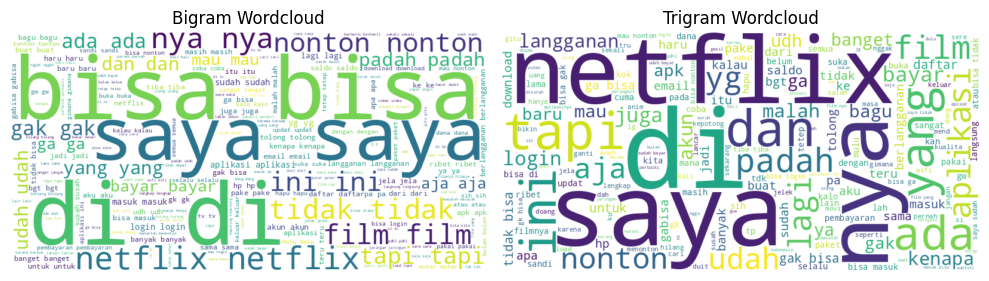

In [ ]:
import pandas as pd
import nltk
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import ast # Import the ast module

# Pastikan untuk mendownload stopwords and punkt if not already
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Add this line to download the missing resource


# Membaca file CSV - Load the preprocessed data instead of the original
df = pd.read_csv('/content/Preprocessing.csv')

# Menampilkan beberapa kolom untuk verifikasi
print(df.columns)

# Convert the 'Filtered' column from string representation of list to actual list
df['Filtered'] = df['Filtered'].apply(ast.literal_eval)


# Fungsi untuk membersihkan teks
def clean_text(text):
    # Ensure the input is a string before applying lower() and translate()
    if not isinstance(text, str):
        return "" # Return an empty string or handle as appropriate
    text = text.lower()  # Mengubah ke huruf kecil
    text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
    return text

# Join the tokens in 'Filtered' column into a string before cleaning
df['Cleaned_Text'] = df['Filtered'].apply(lambda x: clean_text(' '.join(x)))

# Tokenisasi dan stopwords (stopwords will be handled by the clean_text function now)
stop_words = set(stopwords.words('english'))


# Fungsi untuk membuat n-grams (bi-gram dan tri-gram)
def get_ngrams(text, n=2):
    # Ensure the input is a string before tokenizing
    if not isinstance(text, str):
        return [] # Return an empty list or handle as appropriate
    tokens = nltk.word_tokenize(text)  # Tokenisasi
    # Stopwords are already handled in clean_text, but we can re-filter here if needed
    tokens = [word for word in tokens if word not in stop_words]
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Membuat bi-gram (2-grams) dan tri-gram (3-grams)
df['Bigrams'] = df['Cleaned_Text'].apply(lambda x: get_ngrams(x, n=2))
df['Trigrams'] = df['Cleaned_Text'].apply(lambda x: get_ngrams(x, n=3))

# Menampilkan beberapa contoh bi-gram dan tri-gram
print(df[['Bigrams', 'Trigrams']].head())

# Membuat list dari semua bigram dan trigram
all_bigrams = [bigram for sublist in df['Bigrams'] for bigram in sublist if bigram] # Add check for empty bigrams
all_trigrams = [trigram for sublist in df['Trigrams'] for trigram in sublist if trigram] # Add check for empty trigrams


# Membuat wordcloud untuk bigram dan trigram
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_bigrams))
trigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_trigrams))

# Menampilkan wordcloud
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bigram Wordcloud')

plt.subplot(1, 2, 2)
plt.imshow(trigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trigram Wordcloud')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Index(['Skor (Bintang)', 'Ulasan Teks', 'Tanggal Ulasan', 'Balasan Pengembang',
       'Jumlah Like', 'ID Ulasan', 'Case Folding', 'Tokens', 'Stemmed',
       'Filtered', 'Filtered_Text'],
      dtype='object')
                                             Bigrams  \
0  [halo selamat, selamat malam, malam admin, adm...   
1  [rate ga, ga seberapa, seberapa loginnya, logi...   
2  [payah gak, gak bisa, bisa dibuka, dibuka perc...   
3                                                 []   
4       [kualita flimnya, flimnya bagu, bagu sekali]   

                                            Trigrams  
0  [halo selamat malam, selamat malam admin, mala...  
1  [rate ga seberapa, ga seberapa loginnya, seber...  
2  [payah gak bisa, gak bisa dibuka, bisa dibuka ...  
3                                                 []  
4        [kualita flimnya bagu, flimnya bagu sekali]  


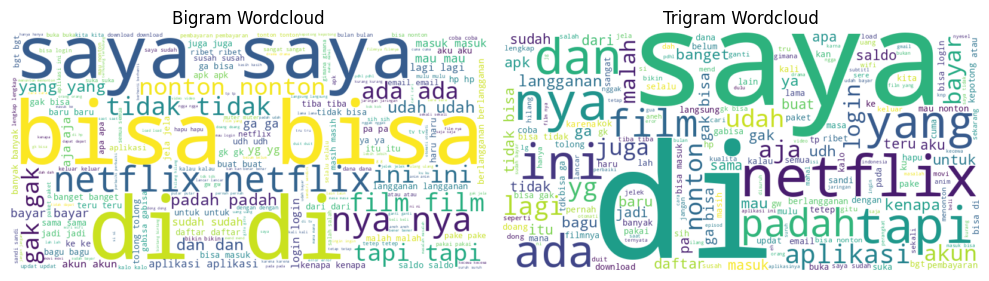

Download Bigram Wordcloud: /content/bigram_wordcloud.png
Download Trigram Wordcloud: /content/trigram_wordcloud.png


In [ ]:
import pandas as pd
import nltk
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import ast  # Import the ast module

# Pastikan untuk mendownload stopwords dan punkt jika belum
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # Tambahkan baris ini untuk mengunduh resource yang hilang

# Membaca file CSV - Load the preprocessed data instead of the original
df = pd.read_csv('/content/Preprocessing.csv')

# Menampilkan beberapa kolom untuk verifikasi
print(df.columns)

# Mengubah kolom 'Filtered' dari representasi string ke list yang sebenarnya
df['Filtered'] = df['Filtered'].apply(ast.literal_eval)

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Memastikan input adalah string sebelum menerapkan lower() dan translate()
    if not isinstance(text, str):
        return ""  # Mengembalikan string kosong atau menangani sesuai kebutuhan
    text = text.lower()  # Mengubah ke huruf kecil
    text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
    return text

# Gabungkan token dalam kolom 'Filtered' menjadi string sebelum dibersihkan
df['Cleaned_Text'] = df['Filtered'].apply(lambda x: clean_text(' '.join(x)))

# Tokenisasi dan stopwords (stopwords sudah ditangani di fungsi clean_text)
stop_words = set(stopwords.words('english'))

# Fungsi untuk membuat n-grams (bi-gram dan tri-gram)
def get_ngrams(text, n=2):
    # Memastikan input adalah string sebelum melakukan tokenisasi
    if not isinstance(text, str):
        return []  # Mengembalikan list kosong atau menangani sesuai kebutuhan
    tokens = nltk.word_tokenize(text)  # Tokenisasi
    # Stopwords sudah ditangani di clean_text, tapi kita bisa menyaring ulang di sini jika perlu
    tokens = [word for word in tokens if word not in stop_words]
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Membuat bi-gram (2-grams) dan tri-gram (3-grams)
df['Bigrams'] = df['Cleaned_Text'].apply(lambda x: get_ngrams(x, n=2))
df['Trigrams'] = df['Cleaned_Text'].apply(lambda x: get_ngrams(x, n=3))

# Menampilkan beberapa contoh bi-gram dan tri-gram
print(df[['Bigrams', 'Trigrams']].head())

# Membuat list dari semua bigram dan trigram
all_bigrams = [bigram for sublist in df['Bigrams'] for bigram in sublist if bigram]  # Menambahkan pengecekan untuk bigram kosong
all_trigrams = [trigram for sublist in df['Trigrams'] for trigram in sublist if trigram]  # Menambahkan pengecekan untuk trigram kosong

# Membuat wordcloud untuk bigram dan trigram
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_bigrams))
trigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_trigrams))

# Menyimpan wordcloud ke dalam file gambar
bigram_wordcloud.to_file('/content/bigram_wordcloud.png')
trigram_wordcloud.to_file('/content/trigram_wordcloud.png')

# Menampilkan wordcloud
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bigram Wordcloud')

plt.subplot(1, 2, 2)
plt.imshow(trigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trigram Wordcloud')

plt.tight_layout()
plt.show()

# Menampilkan pesan link download
print("Download Bigram Wordcloud: /content/bigram_wordcloud.png")
print("Download Trigram Wordcloud: /content/trigram_wordcloud.png")
